In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [2]:
(train_data, train_labels), (val_data, val_labels) = cifar10.load_data()

train_data = train_data / 255.0
val_data = val_data / 255.0

train_labels = to_categorical(train_labels, num_classes=10)
val_labels = to_categorical(val_labels, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

pretrain_model = Model(inputs=base_model.input, outputs=predictions)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
pretrain_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,3

 Total params: 15,250,250 (58.18 MB)

 Trainable params: 535,562 (2.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [6]:
for layer in base_model.layers:
    layer.trainable = False

pretrain_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history_pretrain = pretrain_model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.4920 - loss: 1.4516 - val_accuracy: 0.5614 - val_loss: 1.2310
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5967 - loss: 1.1502 - val_accuracy: 0.5851 - val_loss: 1.1722
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6238 - loss: 1.0630 - val_accuracy: 0.6044 - val_loss: 1.1324
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6461 - loss: 1.0017 - val_accuracy: 0.6150 - val_loss: 1.0965
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6720 - loss: 0.9329 - val_accuracy: 0.6082 - val_loss: 1.1407
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6892 - loss: 0.8832 - val_accuracy: 0.6176 - val_loss: 1.1013
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7095 - loss: 0.8268 - val_accuracy: 0.6211 - val_loss: 1.1059
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7237 - loss: 

In [8]:
for layer in pretrain_model.layers[-4:]:
    layer.trainable = True

pretrain_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history_finetune = pretrain_model.fit(train_data, train_labels, epochs=5, validation_data=(val_data, val_labels))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8146 - loss: 0.5532 - val_accuracy: 0.6363 - val_loss: 1.1178
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8347 - loss: 0.5096 - val_accuracy: 0.6399 - val_loss: 1.1197
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8364 - loss: 0.4992 - val_accuracy: 0.6414 - val_loss: 1.1288
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8428 - loss: 0.4851 - val_accuracy: 0.6382 - val_loss: 1.1299
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8483 - loss: 0.4751 - val_accuracy: 0.6365 - val_loss: 1.1385


In [10]:
val_loss, val_accuracy = pretrain_model.evaluate(val_data, val_labels, verbose=2)
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Validation Loss: {val_loss:.4f}')

313/313 - 2s - 6ms/step - accuracy: 0.6365 - loss: 1.1385
Validation Accuracy: 0.6365
Validation Loss: 1.1385


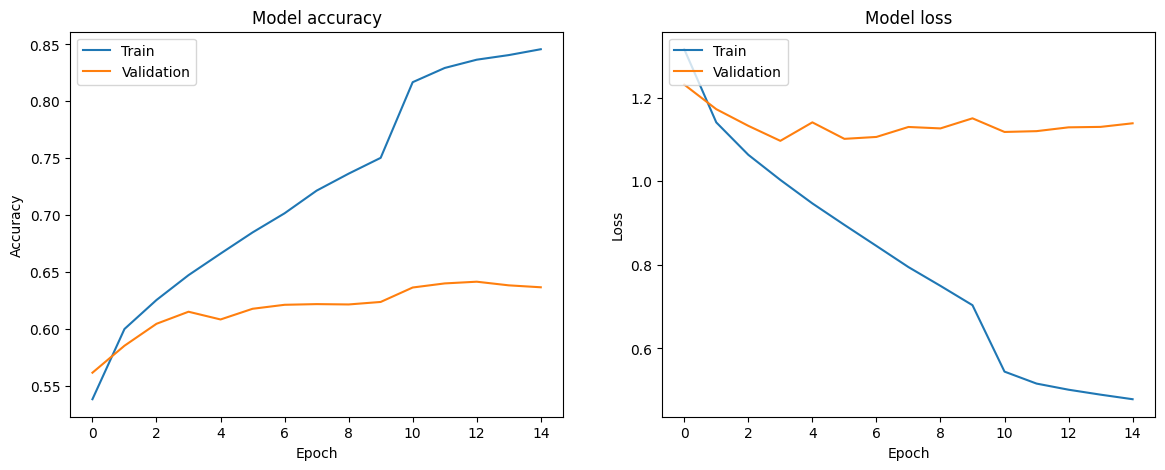

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_pretrain.history['accuracy'] + history_finetune.history['accuracy'])
plt.plot(history_pretrain.history['val_accuracy'] + history_finetune.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_pretrain.history['loss'] + history_finetune.history['loss'])
plt.plot(history_pretrain.history['val_loss'] + history_finetune.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

##Zadanie
Wykonaj fine-tuning modelu Xception albo ResNet50V2 (dostępne w bibliotece keras) dla zbioru danych fashion_mnist (dostępny w keras poprzez funkcję *load_data()*).

In [28]:
#Miejsce na Twój kod
from tensorflow.keras.applications import Xception
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()



In [31]:
x_train.shape
x_train, x_test = x_train/255.0, x_test/255.0

In [30]:
xception_base = keras.applications.Xception(include_top=False)
ga_layer = keras.layers.GlobalAveragePooling2D()(xception_base.output)
output = keras.layers.Dense(10, activation="softmax")(ga_layer)
model = keras.Model(inputs=xception_base.input, outputs=output)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [32]:
for layer in xception_base.layers:
  layer.trainable = False

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [34]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17            │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, None, None, 32) │            864 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, None, None, 32) │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, None, None, 32) │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, None, None, 64) │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, None, None, 64) │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, None, None, 64) │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, None, None,     │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, None, None,     │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, None, None,     │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, None, None,     │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, None, None,     │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, None, None,     │          8,192 │ block1_conv2_act[0][0] │
│                           │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, None, None,     │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)       

 Total params: 20,881,970 (79.66 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [35]:
model.fit(x_train, y_train, epochs=20, validation_split=0.15)

Epoch 1/20
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.2929 - loss: 2.1636 - val_accuracy: 0.3712 - val_loss: 1.9744
Epoch 2/20
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3765 - loss: 1.9362 - val_accuracy: 0.3919 - val_loss: 1.8937
Epoch 3/20
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3982 - loss: 1.8614 - val_accuracy: 0.3992 - val_loss: 1.8479
Epoch 4/20
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4142 - loss: 1.8070 - val_accuracy: 0.4009 - val_loss: 1.8156
Epoch 5/20
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4173 - loss: 1.7768 - val_accuracy: 0.4065 - val_loss: 1.7952
Epoch 6/20
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4246 - loss: 1.7552 - val_accuracy: 0.4107 - val_loss: 1.7785
Epoch 7/20
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4323 - loss: 1.7231 - val_accuracy: 0.4167 - val_loss: 1.7629
Epoch 8/20
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4371 - loss: 

In [36]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4355 - loss: 1.6766


[1.675993800163269, 0.4390000104904175]

In [37]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step


In [38]:
import numpy as np

y_pred=np.argmax(y_pred,axis=1)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.439